In [0]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as cs
from scipy.misc import imshow
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [0]:
# Reads a segmentation csv file.
def read_segmentation_data(file_directory):
  # Open up the file.
  f = open(file_directory)
  # Skip unimportant lines.
  f.readline()
  f.readline()
  f.readline()
  # Read line containing column names.
  headers = f.readline()
  # Skip empty line.
  f.readline()
  # Parse column names line.
  headers = headers.split(',')
  # Read data as matrix of strings.
  data = np.loadtxt(f, dtype = np.dtype(str),delimiter = ',')
  # Parse numbers as floats.
  x = data[:,1:].astype(np.dtype(float))
  # Transform categorical data classes to numbers.
  y = data[:,0]
  b, c = np.unique(y, return_inverse=True)
  # Make our data structured again.
  data[:,0] = c
  data[:,1:] = x
  data = data.astype(np.dtype(float))
  return data, headers, b

In [0]:
# Read train and test data.
d_train, headers, label_train_y  = read_segmentation_data("segmentation.data.txt")
d_test, _, label_test_y= read_segmentation_data("segmentation.test.txt")
# Make sure classes are encoded the same.
if np.array_equal(label_train_y, label_test_y):
  print('Mapping to same representation of classes done !')
else:
  print('Mapping not done correctly, continue on your own risk')
# Create a single data structure for both of them.
data = np.vstack([d_train, d_test])
# Sort data according to class.
data = data[data[:,0].argsort(),:]

# Separate our data structure to different components.
X = data[:,1:]
Y = data[:,0]
x_columns = headers
y_labels = label_train_y
#Begin Mining. :D
print('Number of attributes : ', len(X[0]))
print('Number of readings : ', len(X))
print('Number of classes : ', len(y_labels))

Mapping to same representation of classes done !
Number of attributes :  19
Number of readings :  2310
Number of classes :  7


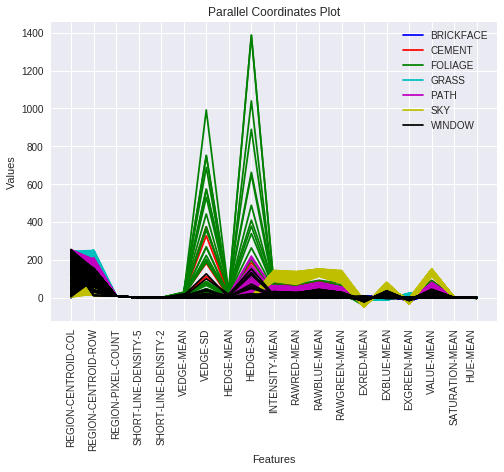

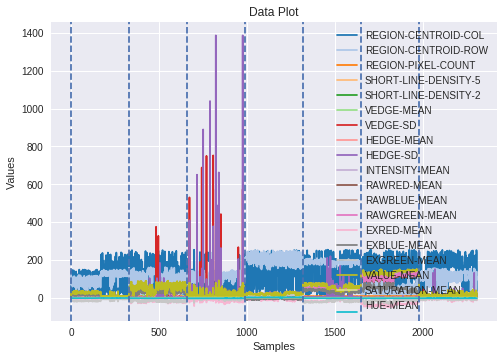

In [0]:
# Do a parallel coordinates plot to show our data.
def plot_parallel_coords(X, x_columns, y_labels, class_jump=330):
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  plt.title('Parallel Coordinates Plot')
  colors = ['b','r', 'g', 'c', 'm', 'y','k','0.75']
  for i in range(len(y_labels)):
    plt.plot(np.arange(len(x_columns)),X[i*class_jump,:].T,c=colors[i], label = y_labels[i])
    plt.plot(np.arange(len(x_columns)),X[i*class_jump:(i+1)*class_jump,:].T,c=colors[i])
  plt.xticks(np.arange(len(x_columns)), x_columns, rotation='vertical')
  plt.xlabel('Features')
  plt.ylabel('Values')
  plt.legend(loc='upper right')
  plt.show()
  
  
  cm = plt.cm.get_cmap('tab20')
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  plt.title('Data Plot')
  for i in range(len(x_columns)):
    plt.plot(np.arange(len(X)),X[:,i],c=cm(i), label = x_columns[i])
  for i in range(len(y_labels)):
    plt.axvline(x=i*class_jump, linestyle='--')
  plt.xlabel('Samples')
  plt.ylabel('Values')
  plt.legend(loc='upper right')
  plt.show()
plot_parallel_coords(X, x_columns, y_labels)

['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN\n']


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


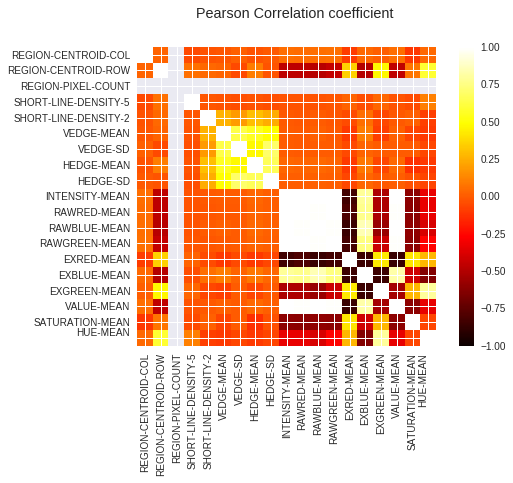

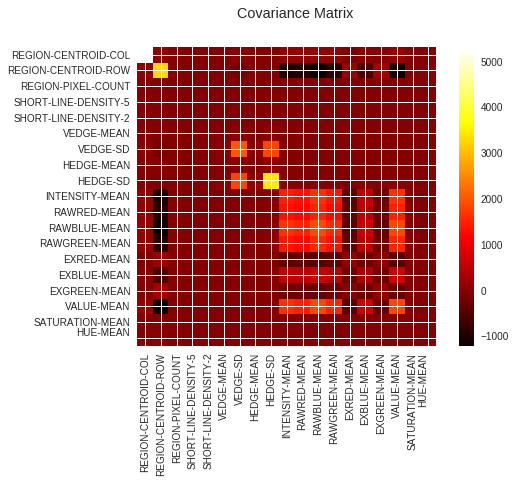

In [0]:
def visualize_pearson(X, x_columns):
# Computing the Pearson’s correlation coefficient between each 2 attributes
  correlation_coef_mat = np.zeros((len(x_columns),len(x_columns)))
  for i in range(len(x_columns)):
    for j in range(i,len(x_columns)):
      r, p_value = pearsonr(X[:,i],X[:,j])
      correlation_coef_mat[i,j] = r
      correlation_coef_mat[j,i] = r
  # Plot Pearson 
  fig, ax = plt.subplots()
  fig.suptitle('Pearson Correlation coefficient')
  im = ax.imshow(correlation_coef_mat, cmap=plt.get_cmap('hot'), interpolation='nearest', vmin=-1, vmax=1)
  fig.colorbar(im)
  ax.set_xticks(np.arange(len(x_columns)))
  ax.set_xticklabels(x_columns, rotation = 'vertical')
  ax.set_yticks(np.arange(len(x_columns)))
  ax.set_yticklabels(x_columns)
  plt.show()
def visualize_covariance(X, x_columns):
  # Compute the covariance 
  cov_mat = np.cov(X, rowvar = False)
  #Plot Covariance Matrix
  fig, ax = plt.subplots()
  fig.suptitle('Covariance Matrix')
  im = ax.imshow(cov_mat, cmap=plt.get_cmap('hot'), interpolation='nearest', vmin=np.min(cov_mat), vmax=np.max(cov_mat))
  ax.set_xticks(np.arange(len(x_columns)))
  ax.set_xticklabels(x_columns, rotation = 'vertical')
  ax.set_yticks(np.arange(len(x_columns)))
  ax.set_yticklabels(x_columns)
  fig.colorbar(im)
  plt.show()   
##print(correlation_coef_mat)
##print(cov_mat)

# Print columns
print(x_columns)
# Nan in Pearson due to a column(index 2 ) having standard deviation of 0.
# Plot pearson
visualize_pearson(X, x_columns)

#Plot Covariance
visualize_covariance(X, x_columns)




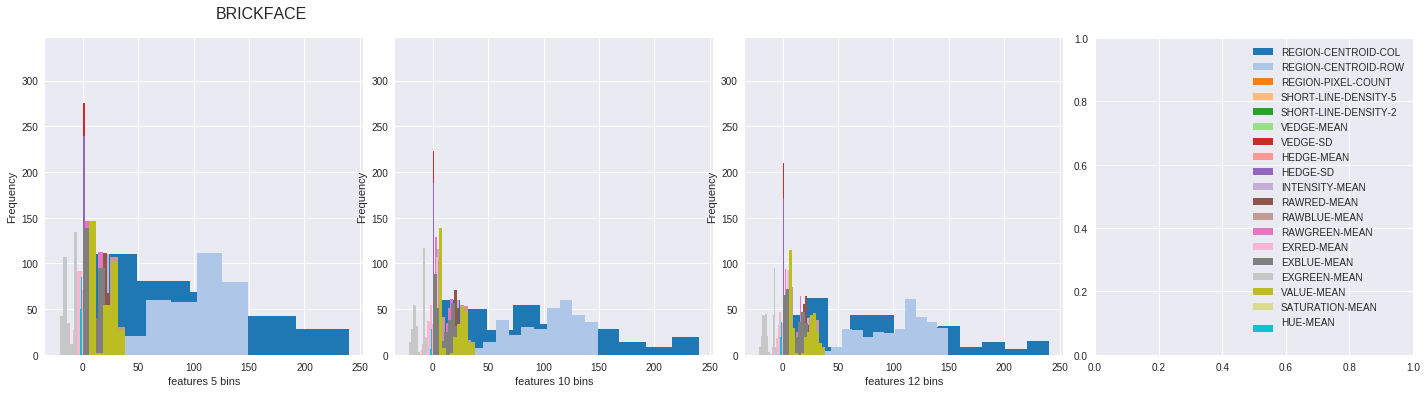

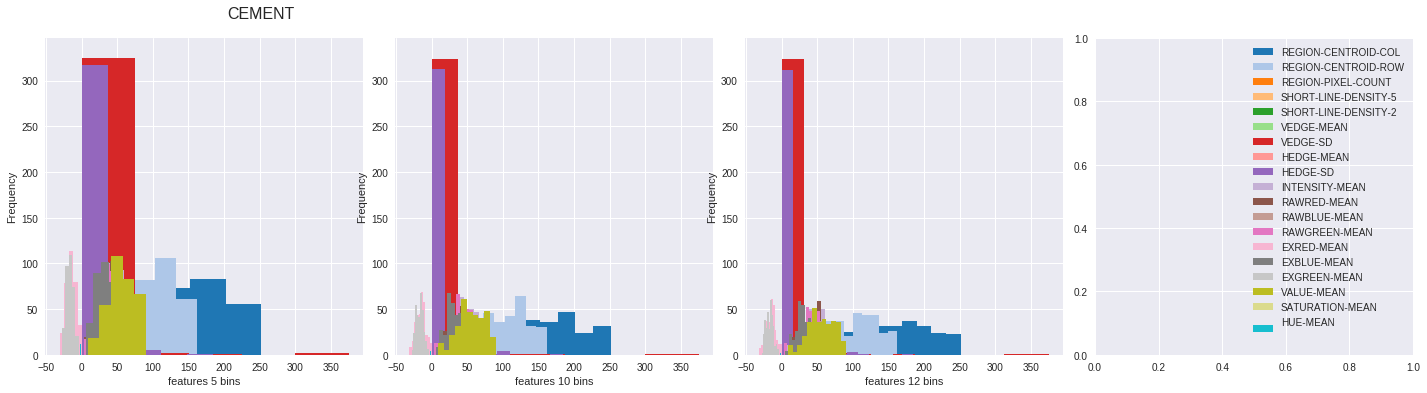

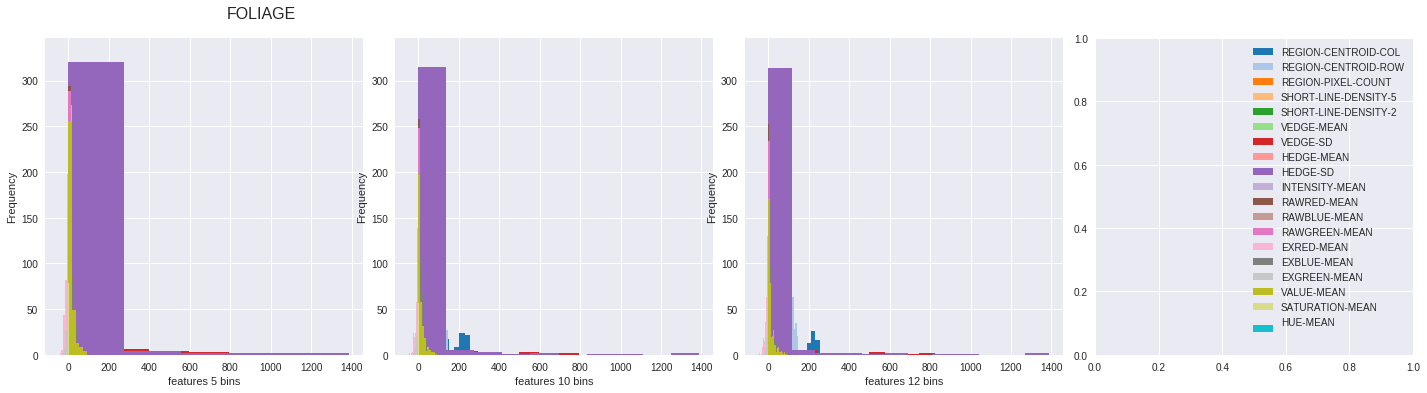

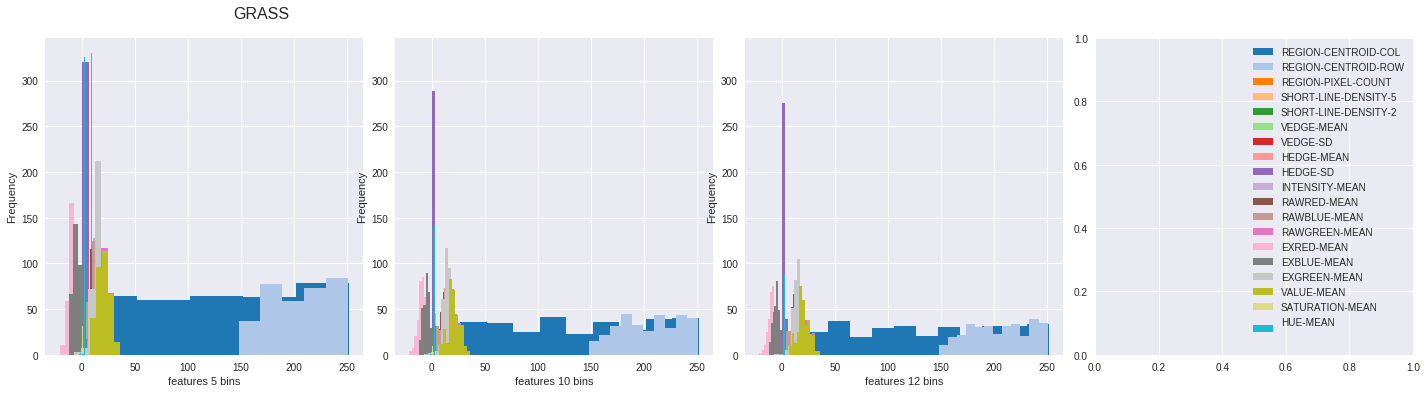

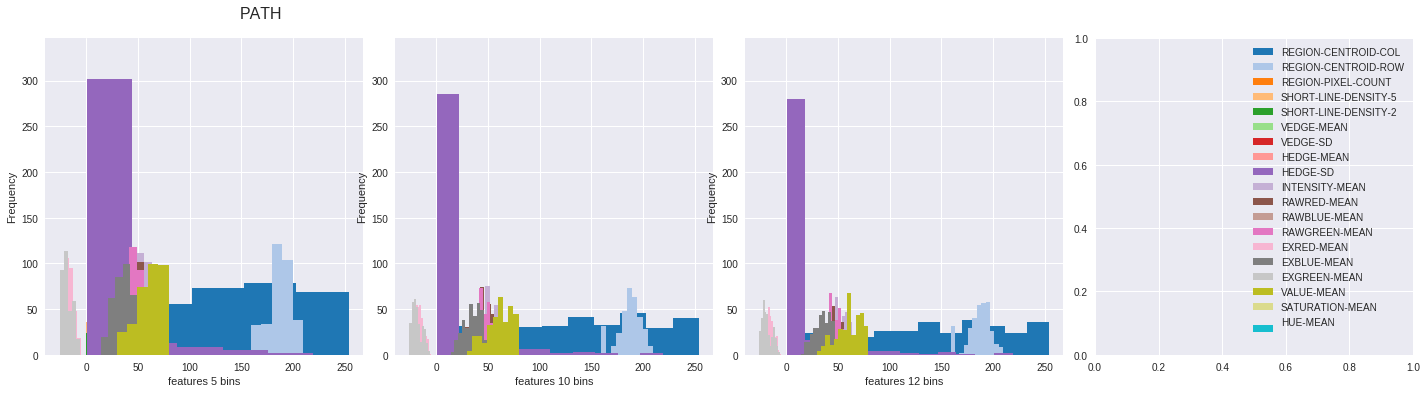

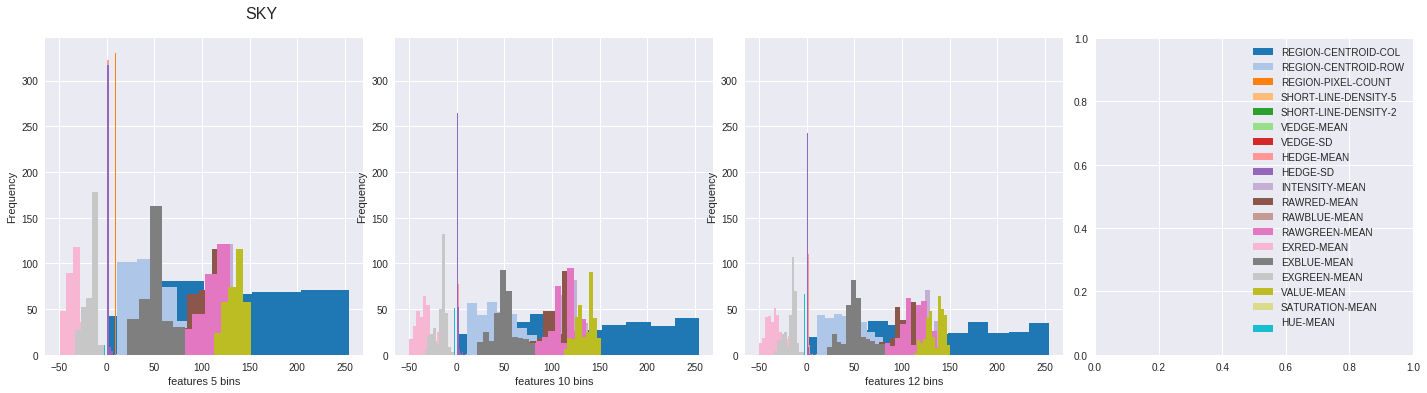

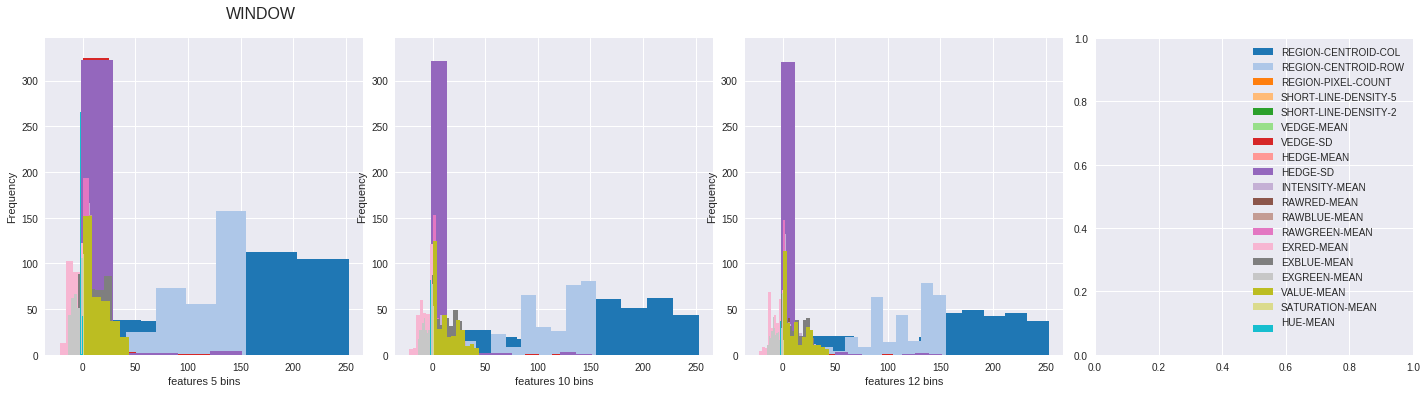

In [0]:
## Do histogram for each class
def visualise_data_histograms(X, x_columns, class_jump=330):
  bin_nums = [5, 10, 12] 
  cm = plt.cm.get_cmap('tab20')
  for i in range(len(y_labels)):
    fig, axes = plt.subplots(1,len(bin_nums) + 1)
    fig.suptitle(y_labels[i], fontsize = 16)
    axe_ind = 0
    for bin_num in bin_nums:
      ax = axes[axe_ind]
      ax.set_xlabel('features ' + str(bin_num) + ' bins')
      ax.set_ylabel('Frequency')
      for j in range(len(x_columns)):
        ax.hist(X[i * class_jump: (i+1)* class_jump, j], bins = bin_num,label=x_columns[j], color = cm(j))
      axe_ind = axe_ind + 1
    handles, labels = axes[0].get_legend_handles_labels()
    axes[len(bin_nums)].legend(handles, labels, loc='upper right')
    fig.subplots_adjust(left=0.125, bottom=0.1,
                        right=2.5, top=0.9,
                        wspace=0.1, hspace=0.1)
    plt.show()  
visualise_data_histograms(X,x_columns)      
      

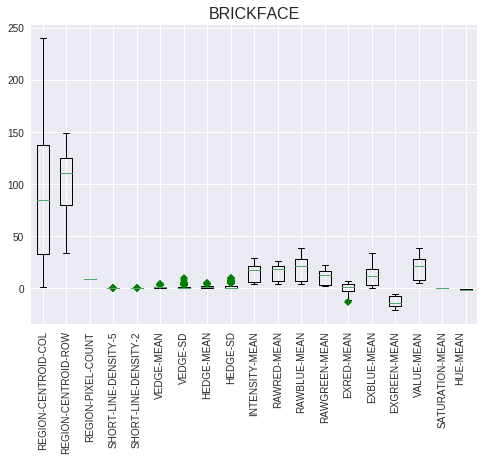

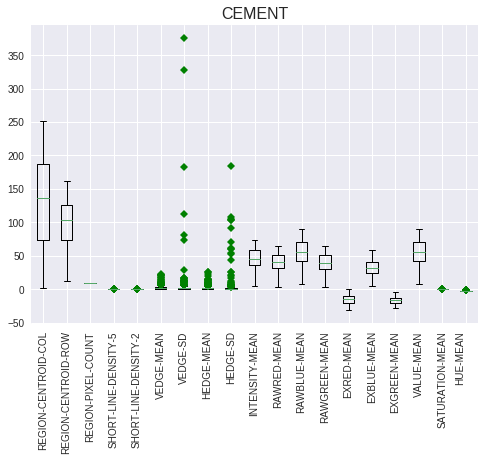

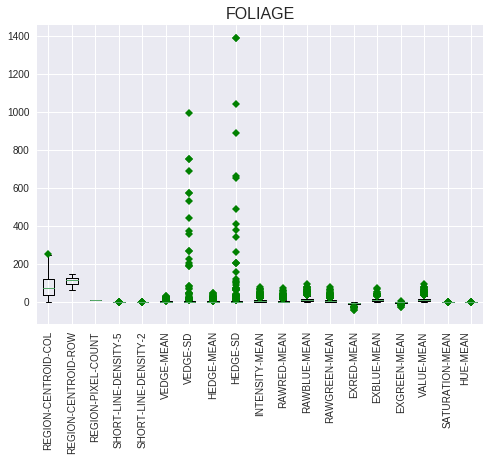

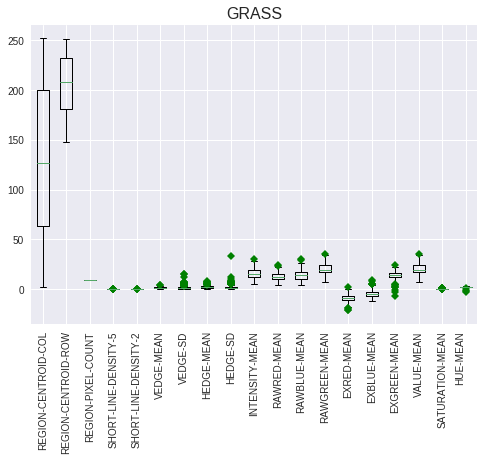

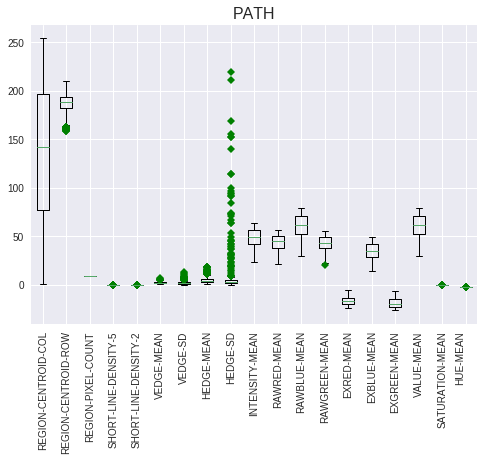

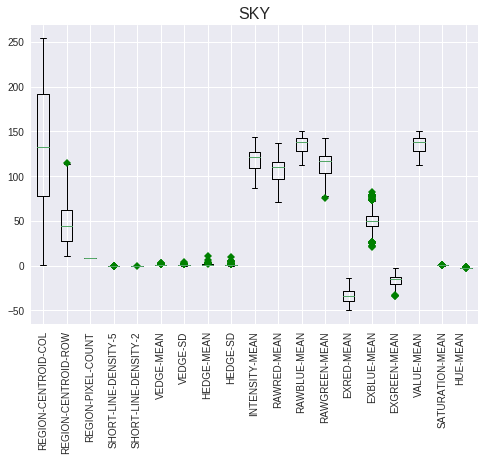

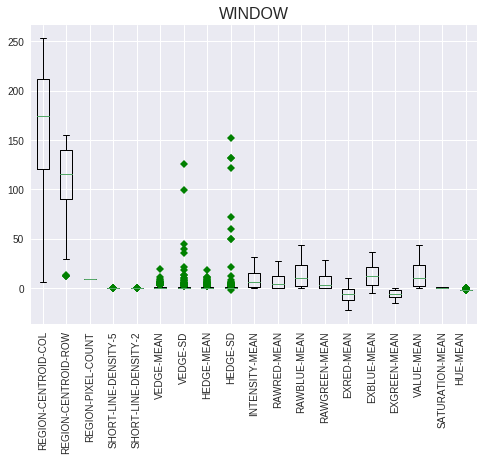

In [0]:
## Do boxplots for each class
def visualise_data_boxplots(X, x_columns, class_jump=330):
  for i in range(len(y_labels)):
    plt.title(y_labels[i], fontsize = 16)
    plt.boxplot(X[i*class_jump : (i + 1) * class_jump], 0, 'gD')
    plt.xticks(np.arange(1,len(x_columns) + 1), x_columns, rotation='vertical')
    plt.show()  
visualise_data_boxplots(X,x_columns)      

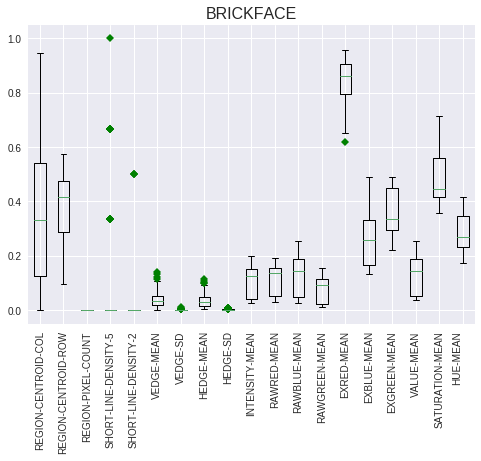

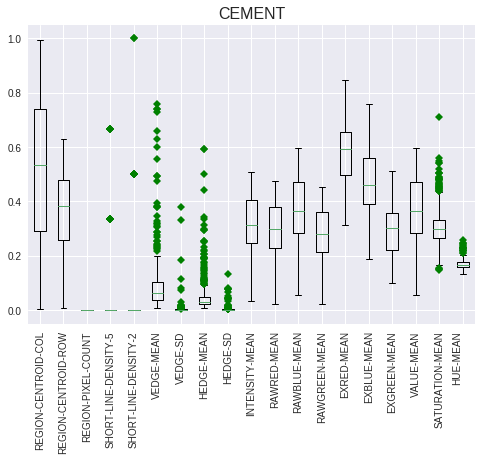

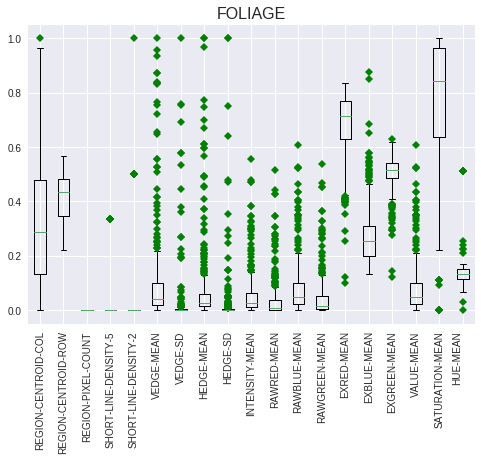

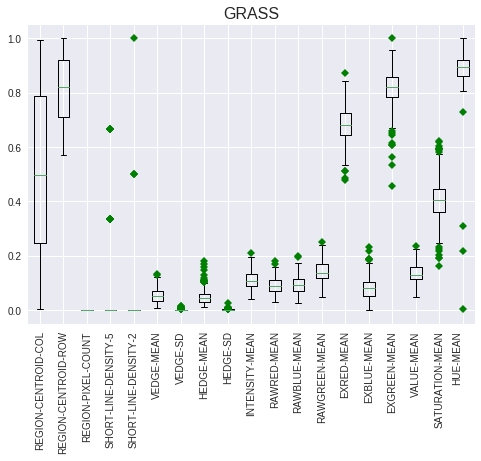

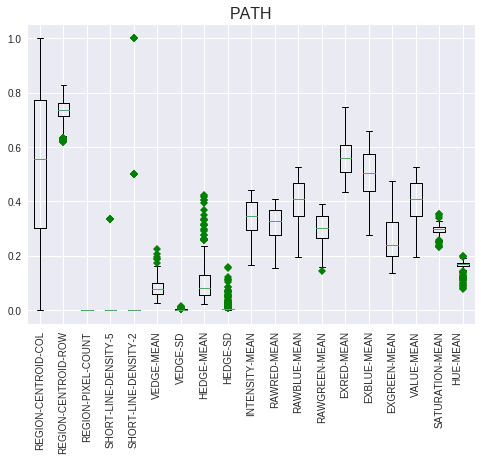

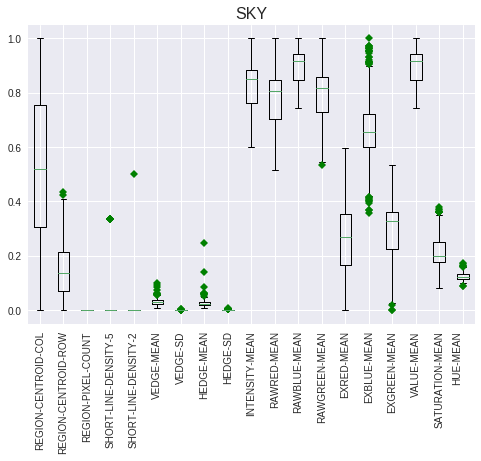

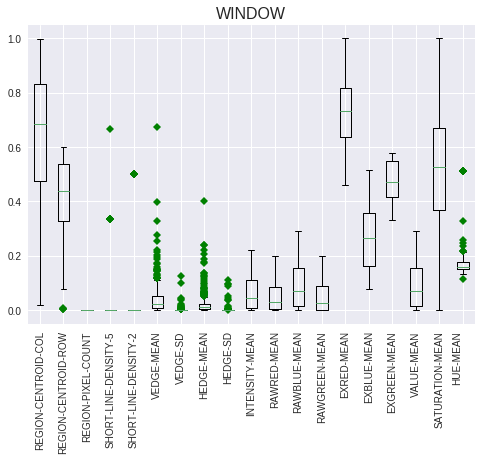

In [0]:
# Normalization using min max scalar
scaler = MinMaxScaler()
scaler.fit(X)
minmax_X = scaler.transform(X)
visualise_data_boxplots(minmax_X,x_columns)
      


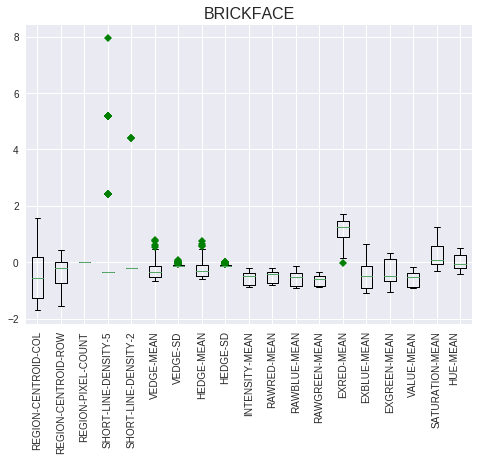

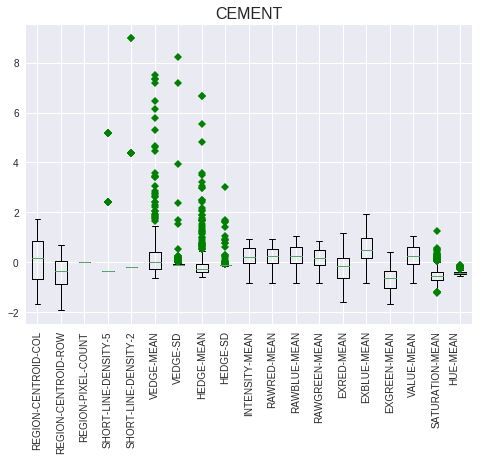

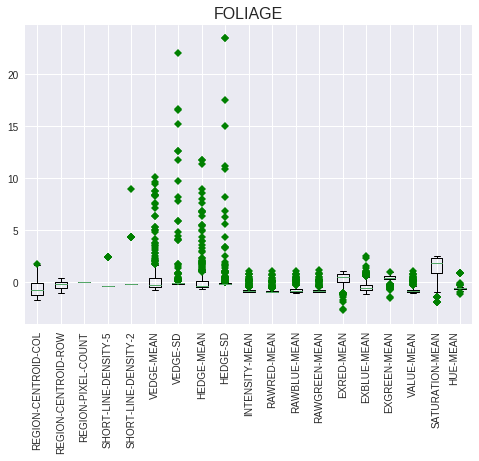

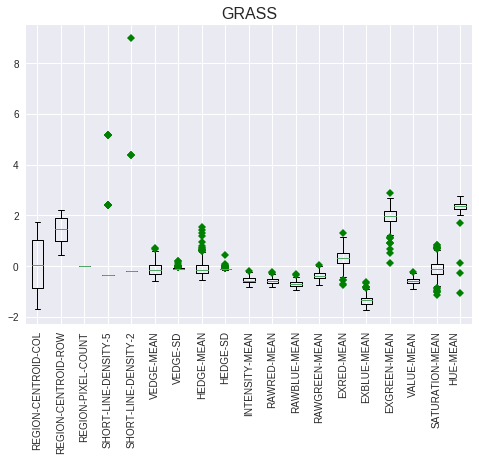

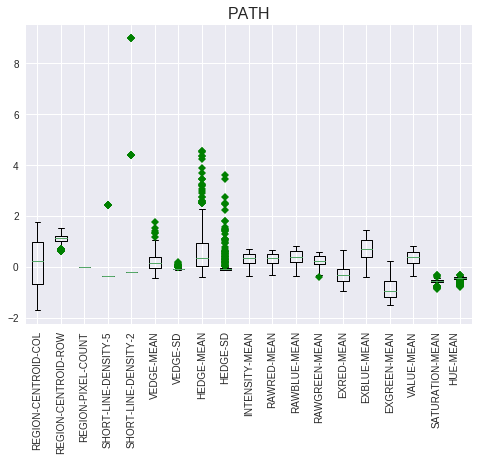

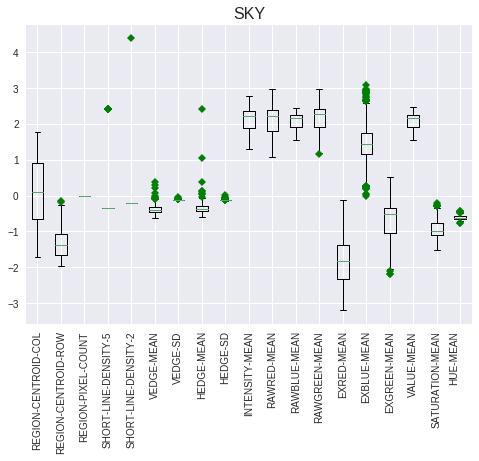

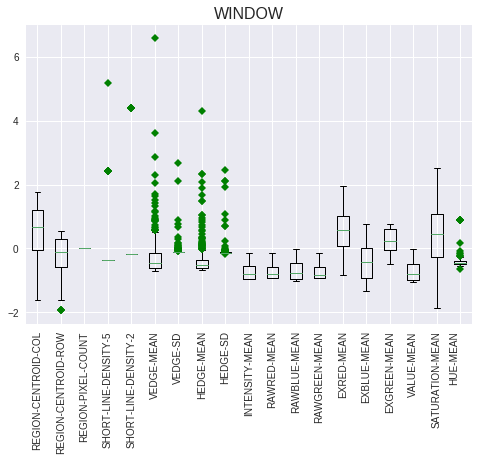

In [0]:
z_score_X = scale(X)
visualise_data_boxplots(z_score_X,x_columns)

In [0]:
# Draw PCA contribution to variance.
pca = PCA(n_components=len(x_columns))
pca.fit(z_score_X)
plt.bar(np.arange(len(x_columns)), pca.explained_variance_ratio_ )
plt.xticks(np.arange(len(x_columns)))
plt.show()
print(z_score_X)


NameError: ignored

Components used :  1
Variance captured :  0.42341140944330324


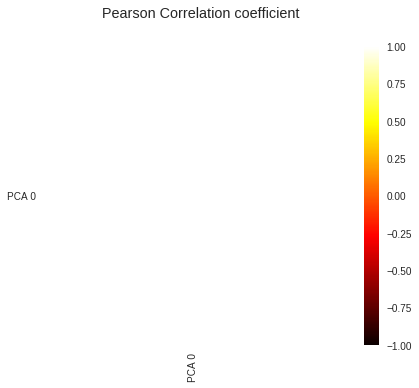

Components used :  2
Variance captured :  0.5854481143629116


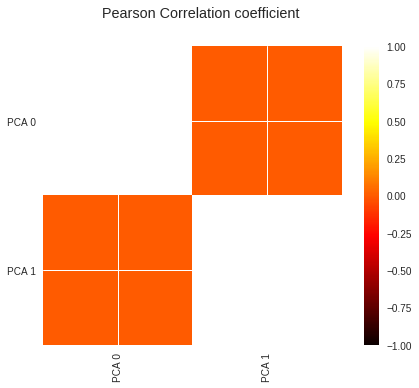

Components used :  3
Variance captured :  0.6850426841719277


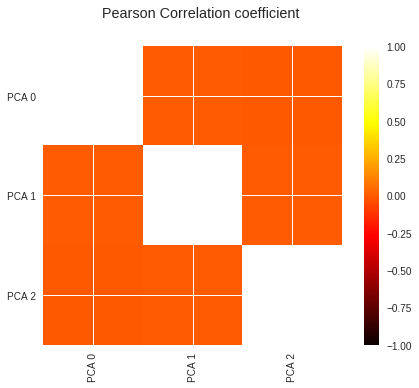

Components used :  4
Variance captured :  0.7436155260992445


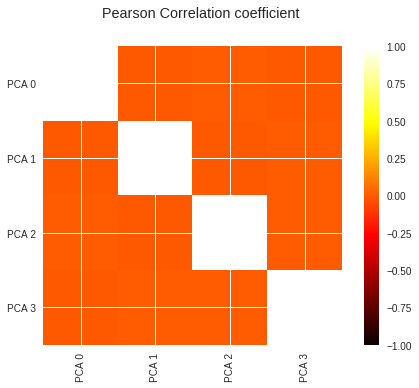

Components used :  5
Variance captured :  0.795595345924503


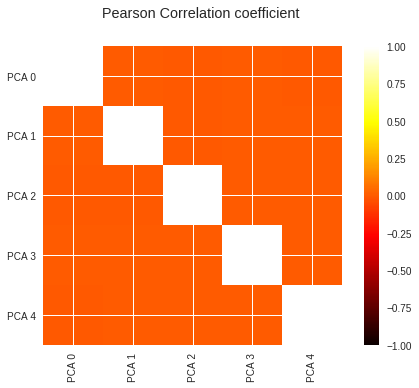

Components used :  6
Variance captured :  0.8460991171517341


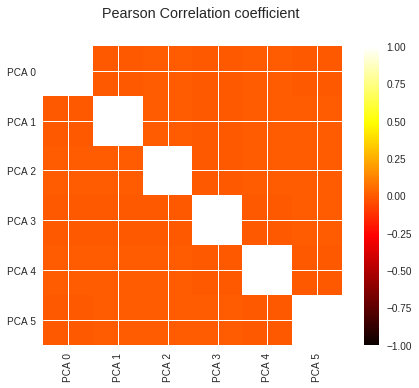

Components used :  7
Variance captured :  0.886513264396943


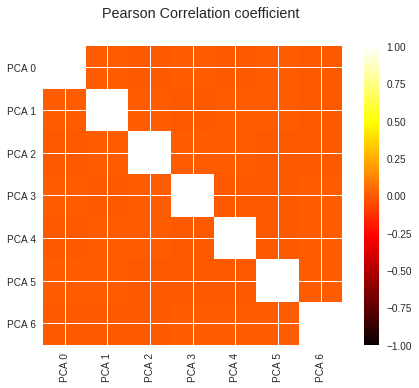

Components used :  8
Variance captured :  0.9177145067313959


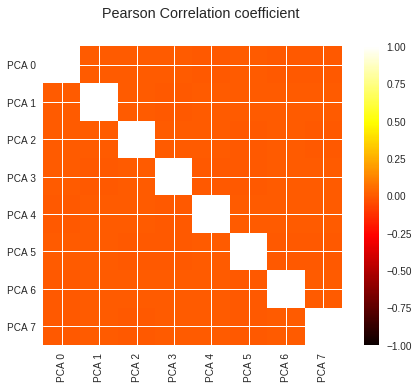

Components used :  9
Variance captured :  0.9477125576053176


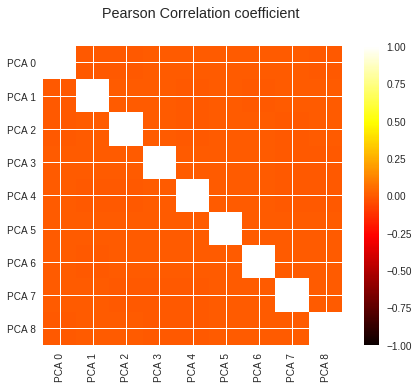

Components used :  10
Variance captured :  0.9696627180415497


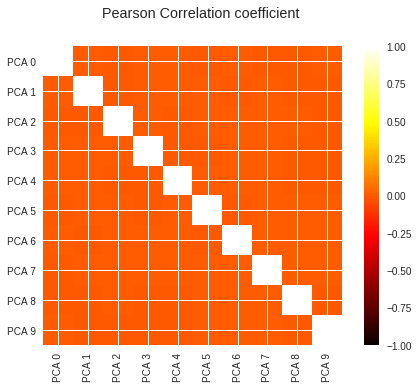

Components used :  11
Variance captured :  0.9838836660497468


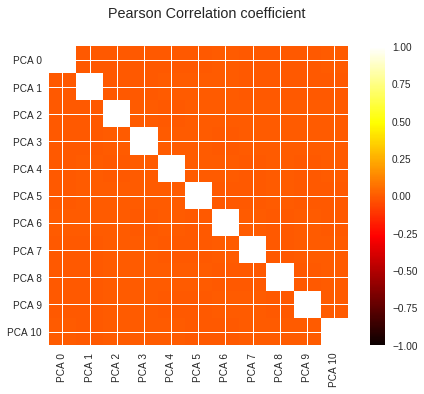

Components used :  12
Variance captured :  0.9938189636021938


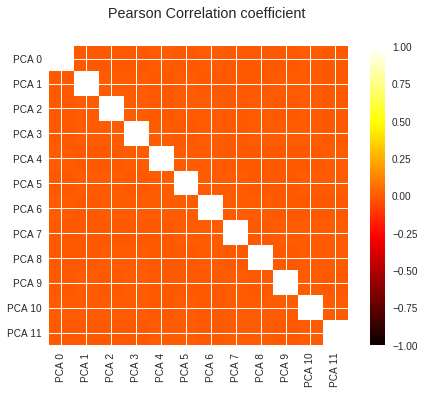

Components used :  13
Variance captured :  0.9999825883162481


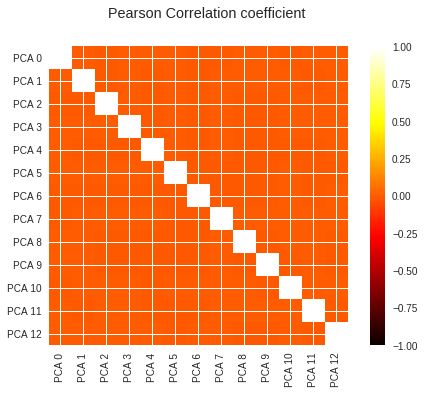

In [0]:
for n in range(1,14):
  pca = PCA(n_components=n)
  pca.fit(z_score_X)
  print('Components used : ', n)
  print('Variance captured : ', np.sum(pca.explained_variance_ratio_))
  mod_x = pca.transform(z_score_X)
  names = ['PCA ' + str(i) for i in np.arange(n)]
  visualize_pearson(mod_x, names)
  

features used :  1


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [2] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


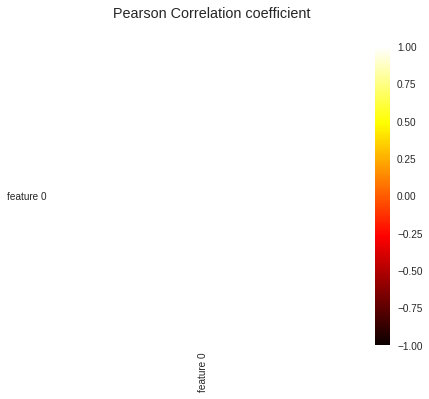

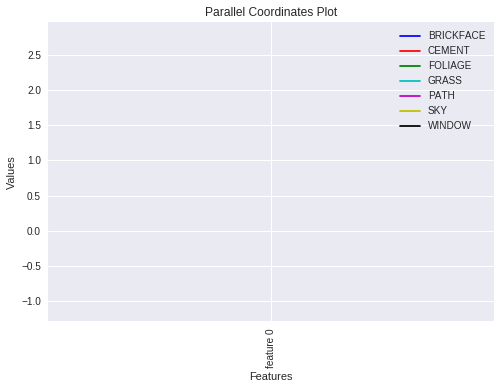

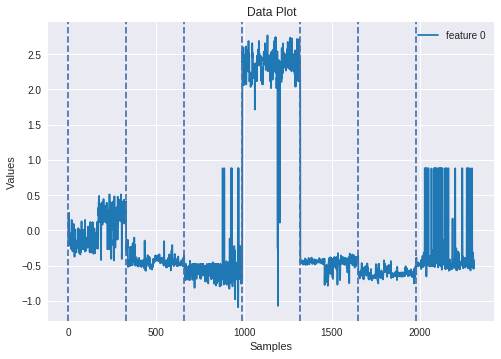

features used :  2


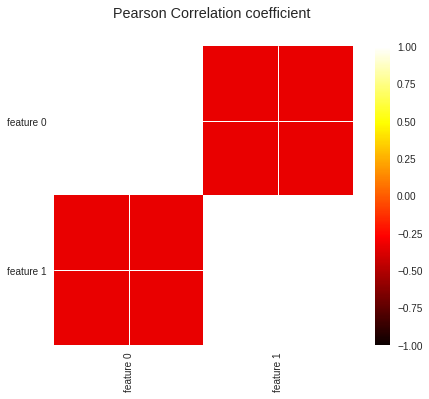

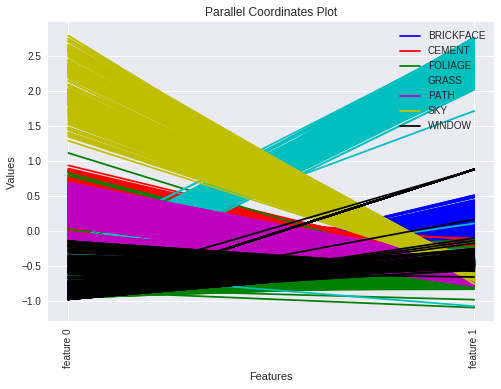

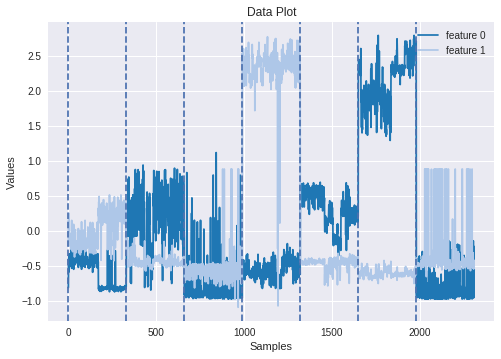

features used :  3


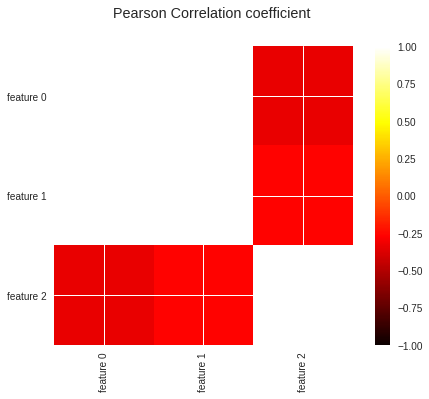

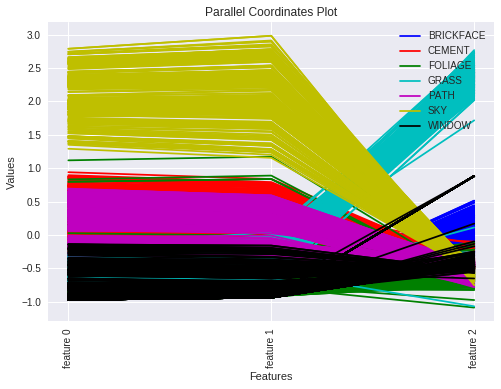

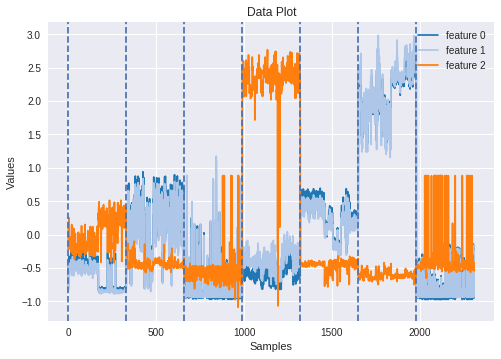

features used :  4


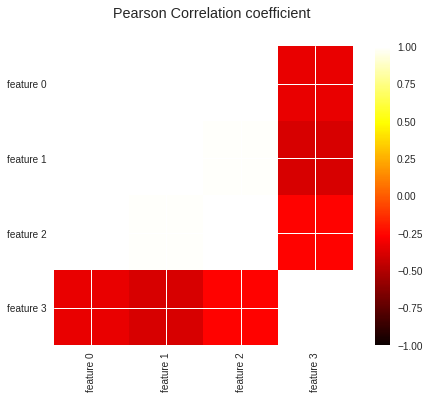

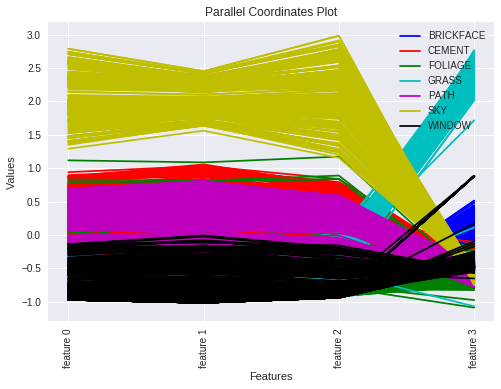

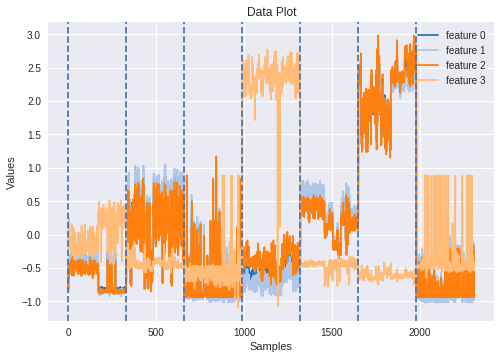

features used :  5


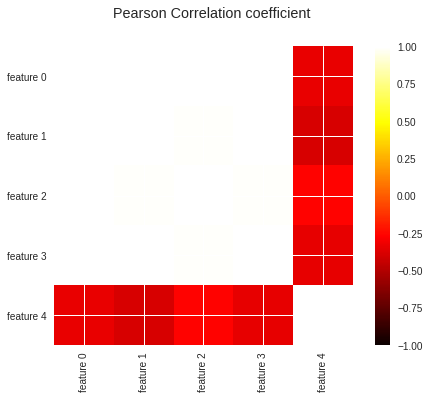

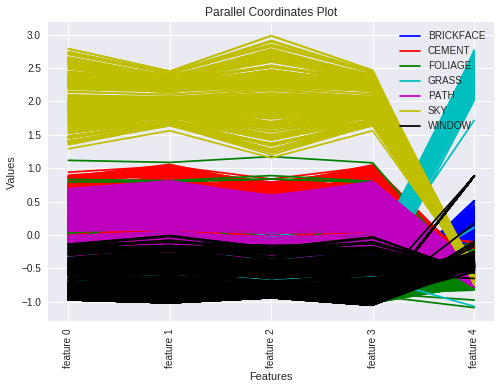

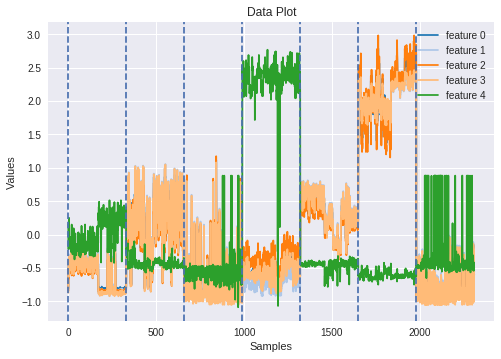

features used :  6


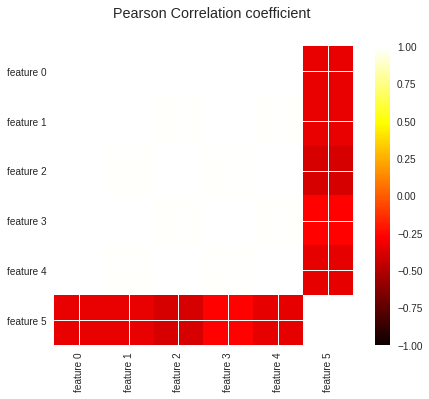

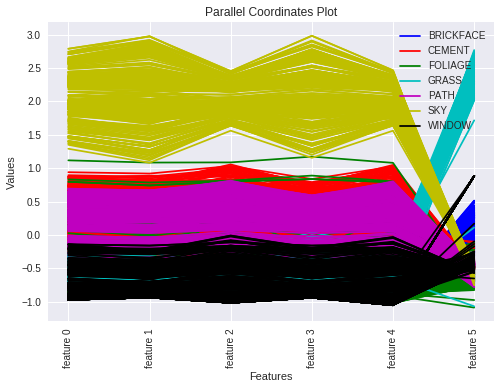

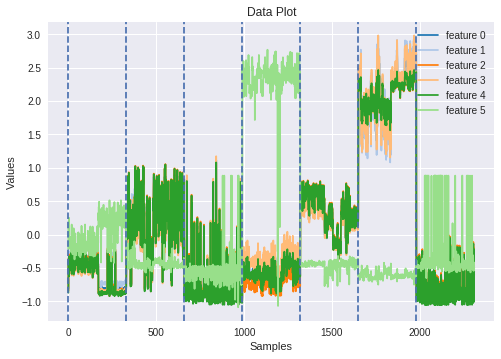

features used :  7


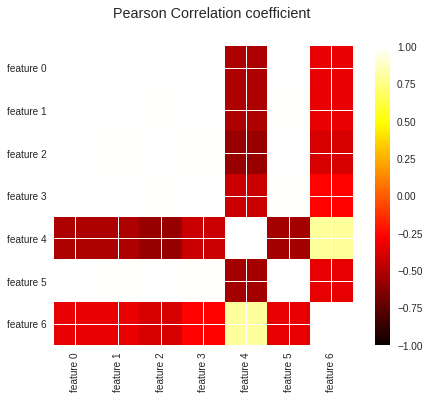

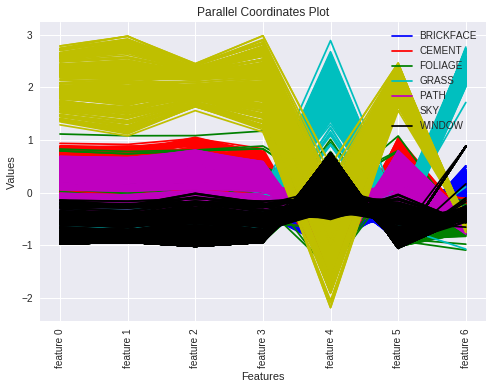

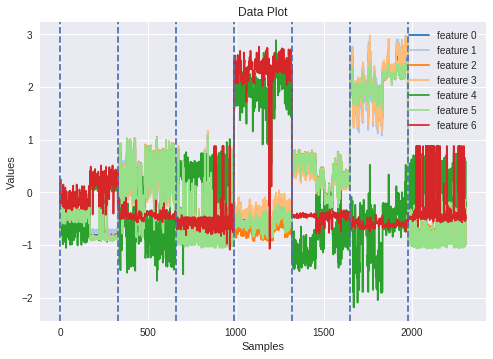

features used :  8


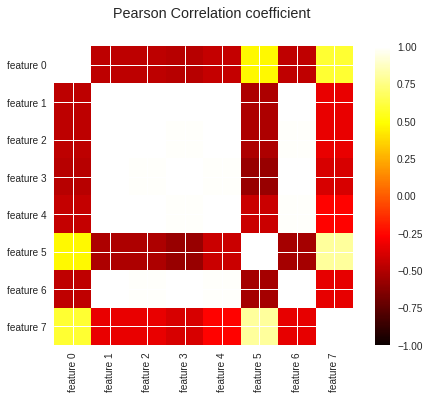

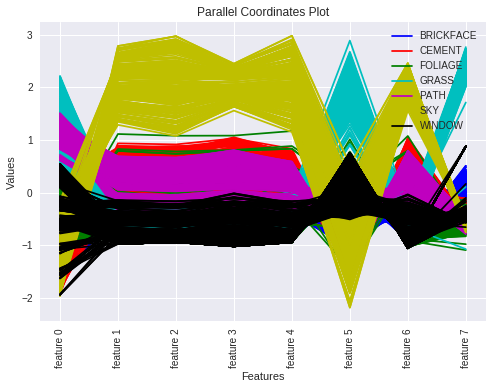

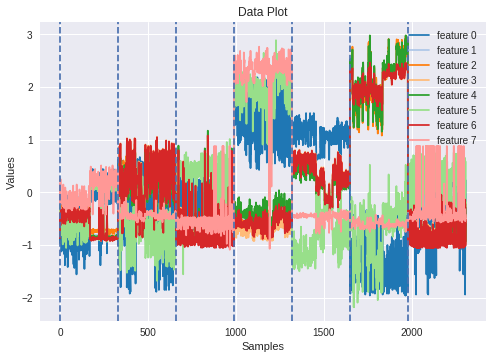

features used :  9


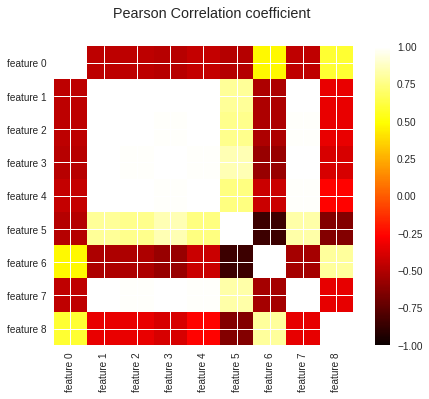

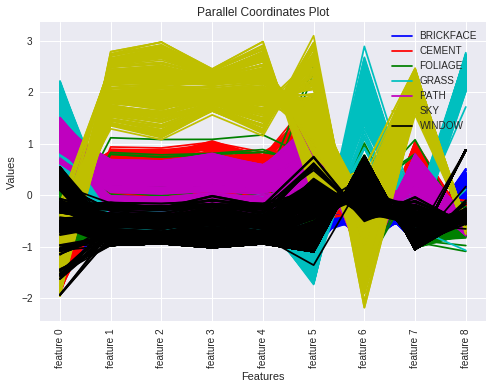

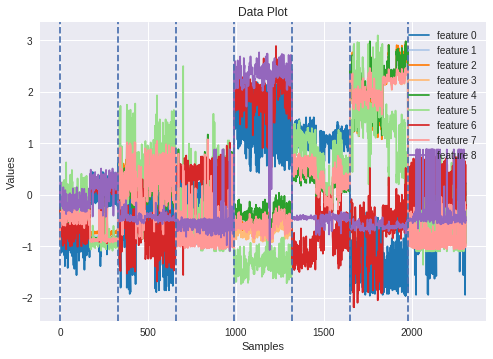

features used :  10


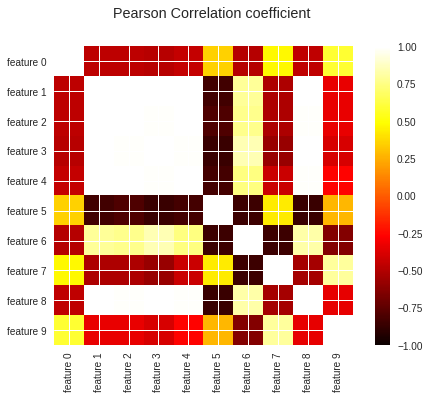

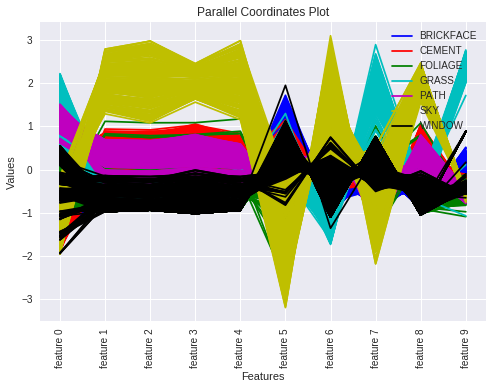

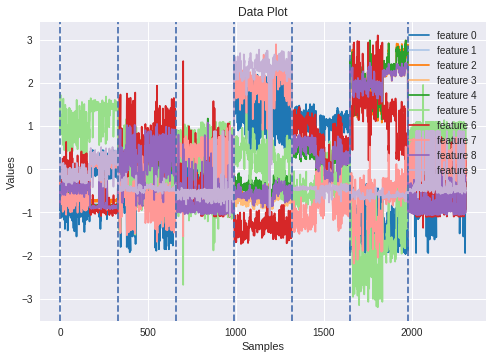

features used :  11


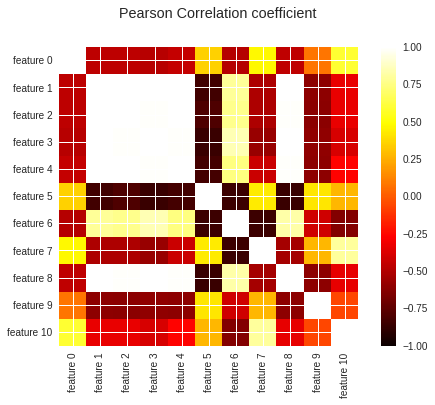

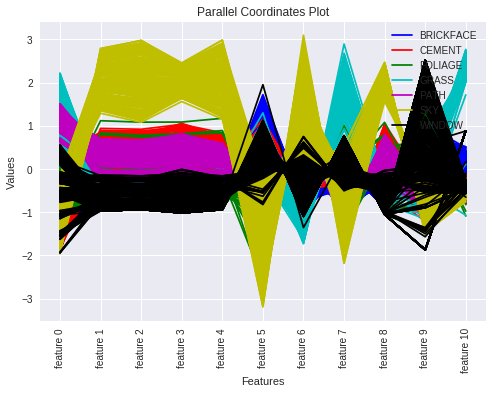

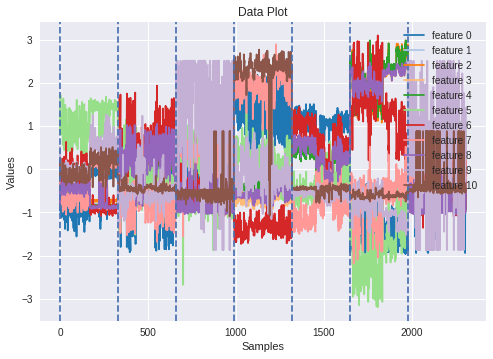

features used :  12


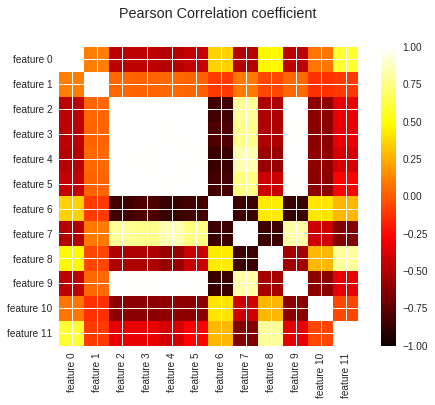

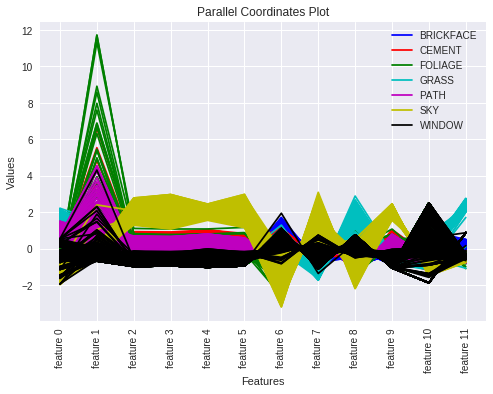

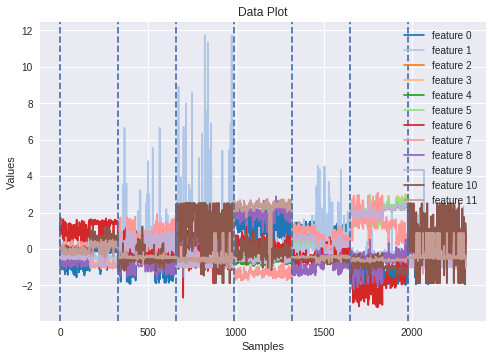

features used :  13


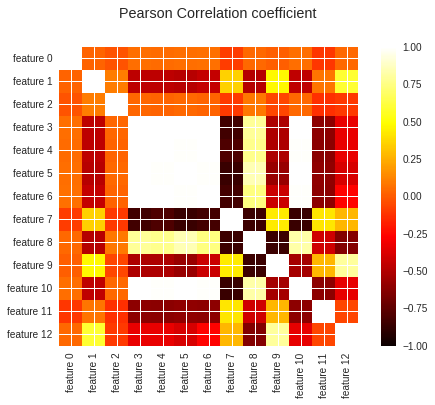

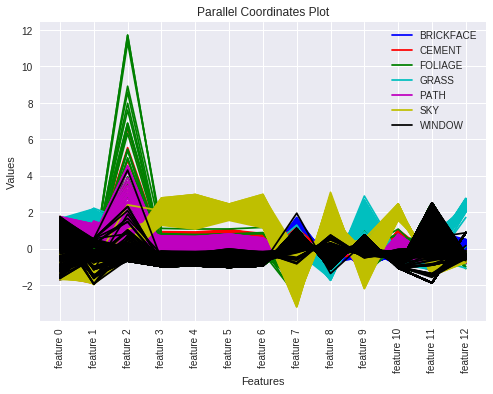

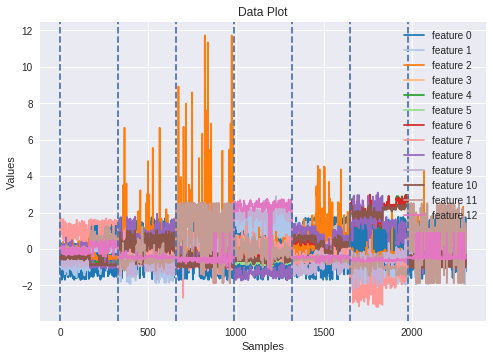

In [0]:
# Apply best k features, same as pca ?
for n in range(1,14):
  kselector = SelectKBest(k=n)
  kselector.fit(z_score_X, Y)
  print('features used : ', n)
  #print('Variance captured : ', np.sum(pca.explained_variance_ratio_))
  mod_x = kselector.transform(z_score_X)
  names = ['feature ' + str(i) for i in np.arange(n)]
  visualize_pearson(mod_x, names)
  plot_parallel_coords(mod_x, names, y_labels)